<a href="https://colab.research.google.com/github/Aryanchib/DataScience_Assignment/blob/main/A13DeciTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DECISION TREE
1. Data Preparation:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
data=pd.read_excel('/content/sample_data/heart_disease.xlsx',sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 2. Exploratory Data Analysis (EDA):

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].median())
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


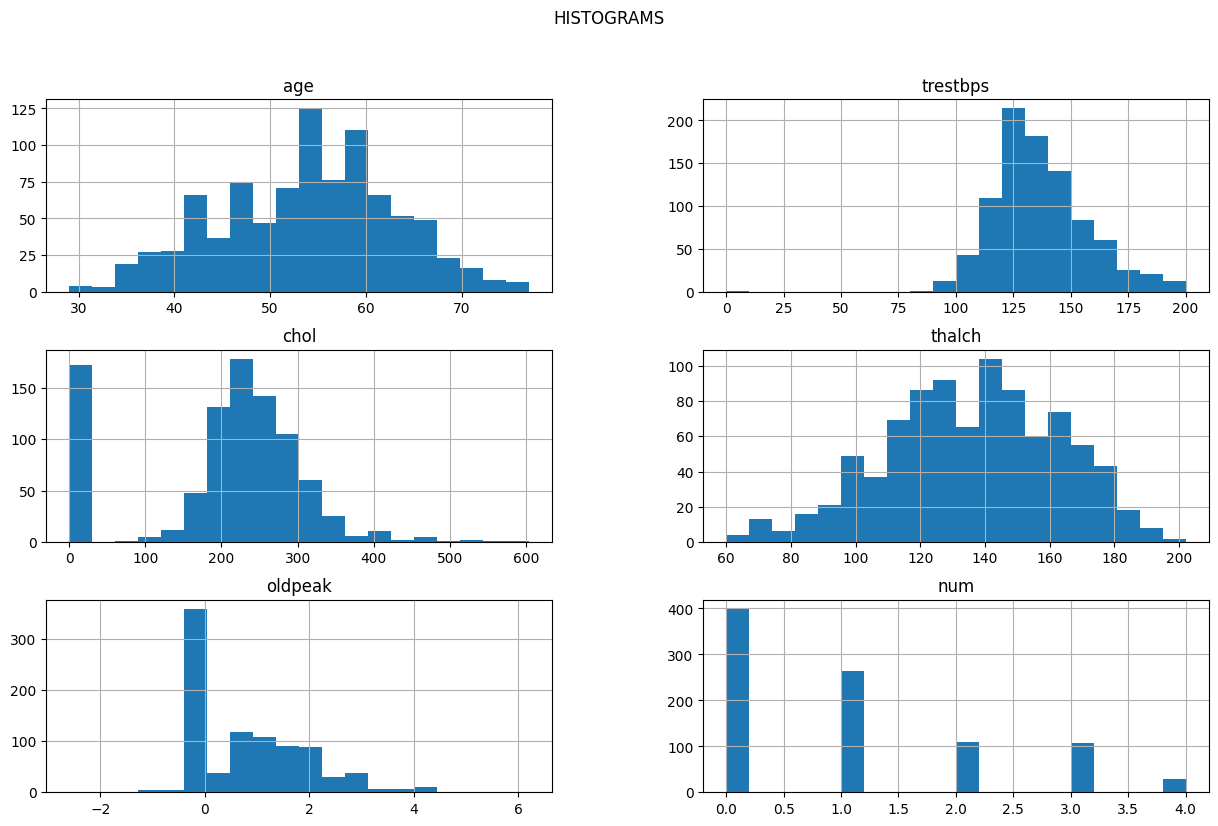

In [ ]:
data.hist(bins=20,figsize=(15,9))
plt.suptitle("HISTOGRAMS")
plt.show()

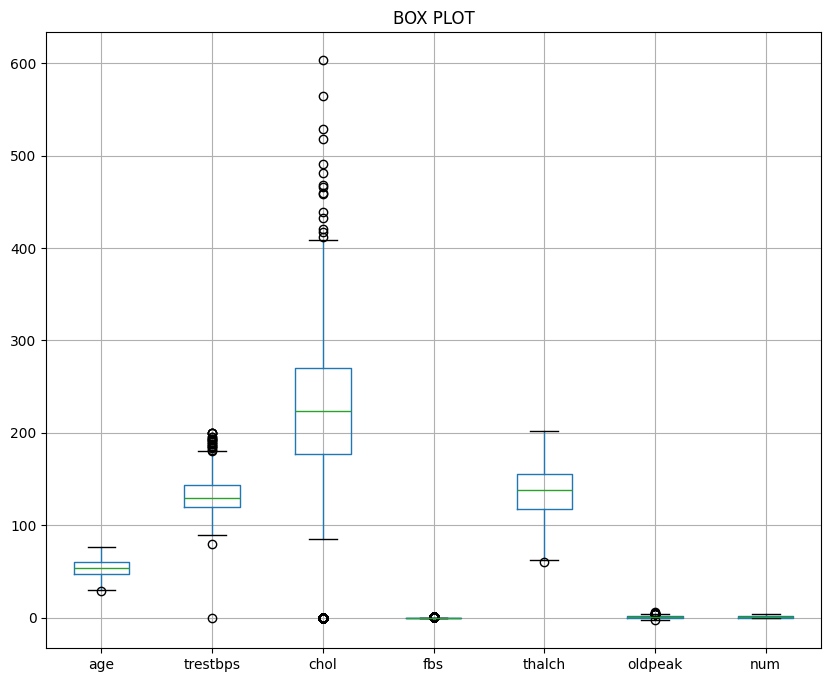

In [ ]:
plt.figure(figsize=(10,8))
data.boxplot()
plt.title('BOX PLOT')
plt.show()

# 3. Feature Engineering:

In [ ]:
#converting bool to int
data['fbs'] = data['fbs'].astype(int)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,0,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,0,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,0,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,1,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [ ]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,object
oldpeak,float64


* In Python, particularly when working with pandas DataFrames, the object and string data types are often used to represent textual data, but they have some differences:

* object Data Type
General Purpose: The object data type is a general-purpose type that can hold any Python object, including strings, numbers, lists, or even custom objects.
Flexibility: It provides flexibility but at the cost of performance and memory efficiency.
Usage: Commonly used for columns that contain mixed types or when the exact type is not known in advance.
* string Data Type
Specific to Text: The string data type is specifically designed to hold text data.
Performance: It is more memory-efficient and can offer better performance for operations involving text data.
Usage: Preferred when you know the column will only contain text data.

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)


In [ ]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,object
oldpeak,float64


 This is converting all columns with an object data type to strings. This can be useful when you need to ensure that all categorical data is treated as strings for further processing or analysis.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_val=data.select_dtypes(include='object').columns
label=LabelEncoder()
for col in categorical_val:
    data[col]=label.fit_transform(data[col])

In [ ]:
data.rename(columns={'num':'target'},inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,0.5,0,0,4


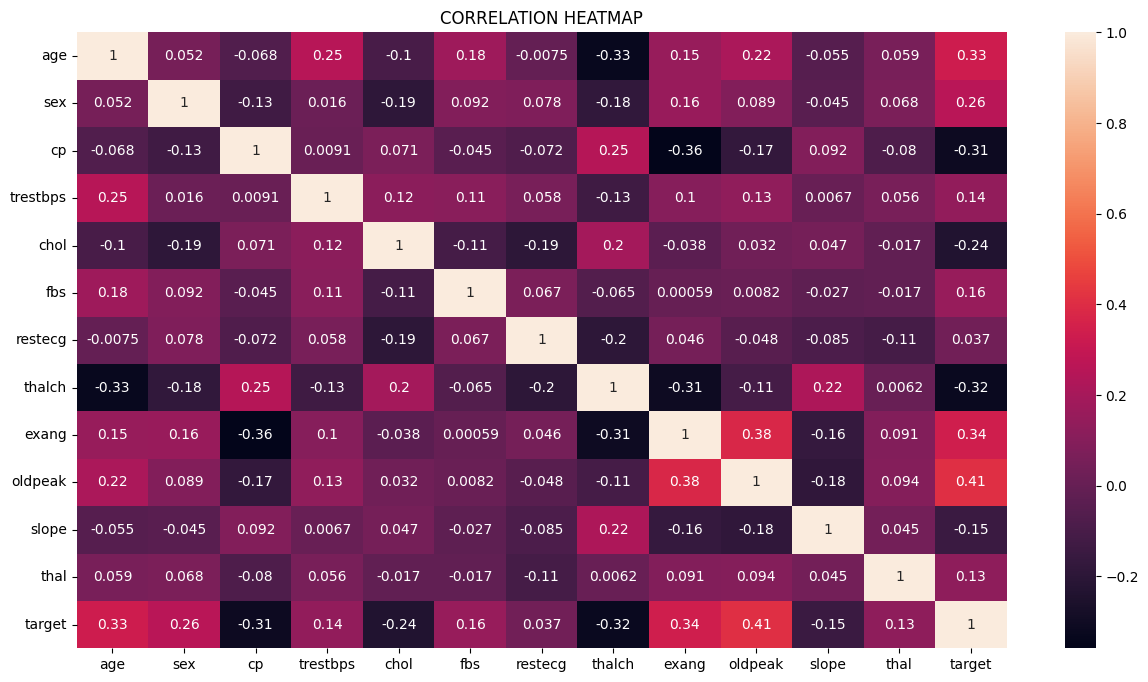

In [ ]:
corrlaton_matrix=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrlaton_matrix,annot=True)
plt.title('CORRELATION HEATMAP')
plt.show()

# Task-4.Decision Tree Classification:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


In [ ]:
x=data.drop('target',axis=1)
y=data['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       122
           1       0.49      0.41      0.45        82
           2       0.29      0.15      0.20        34
           3       0.40      0.07      0.12        28
           4       0.00      0.00      0.00         7

    accuracy                           0.55       273
   macro avg       0.36      0.31      0.30       273
weighted avg       0.50      0.55      0.50       273



# Task-5. Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7],'splitter':['random','best']}
grid=GridSearchCV(model,params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['random', 'best']})

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

In [ ]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='random')
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [ ]:
y_pred1=model2.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       122
           1       0.44      0.55      0.49        82
           2       0.00      0.00      0.00        34
           3       0.15      0.07      0.10        28
           4       0.00      0.00      0.00         7

    accuracy                           0.56       273
   macro avg       0.25      0.30      0.27       273
weighted avg       0.45      0.56      0.50       273



# Task-6. Model Evaluation and Analysis:

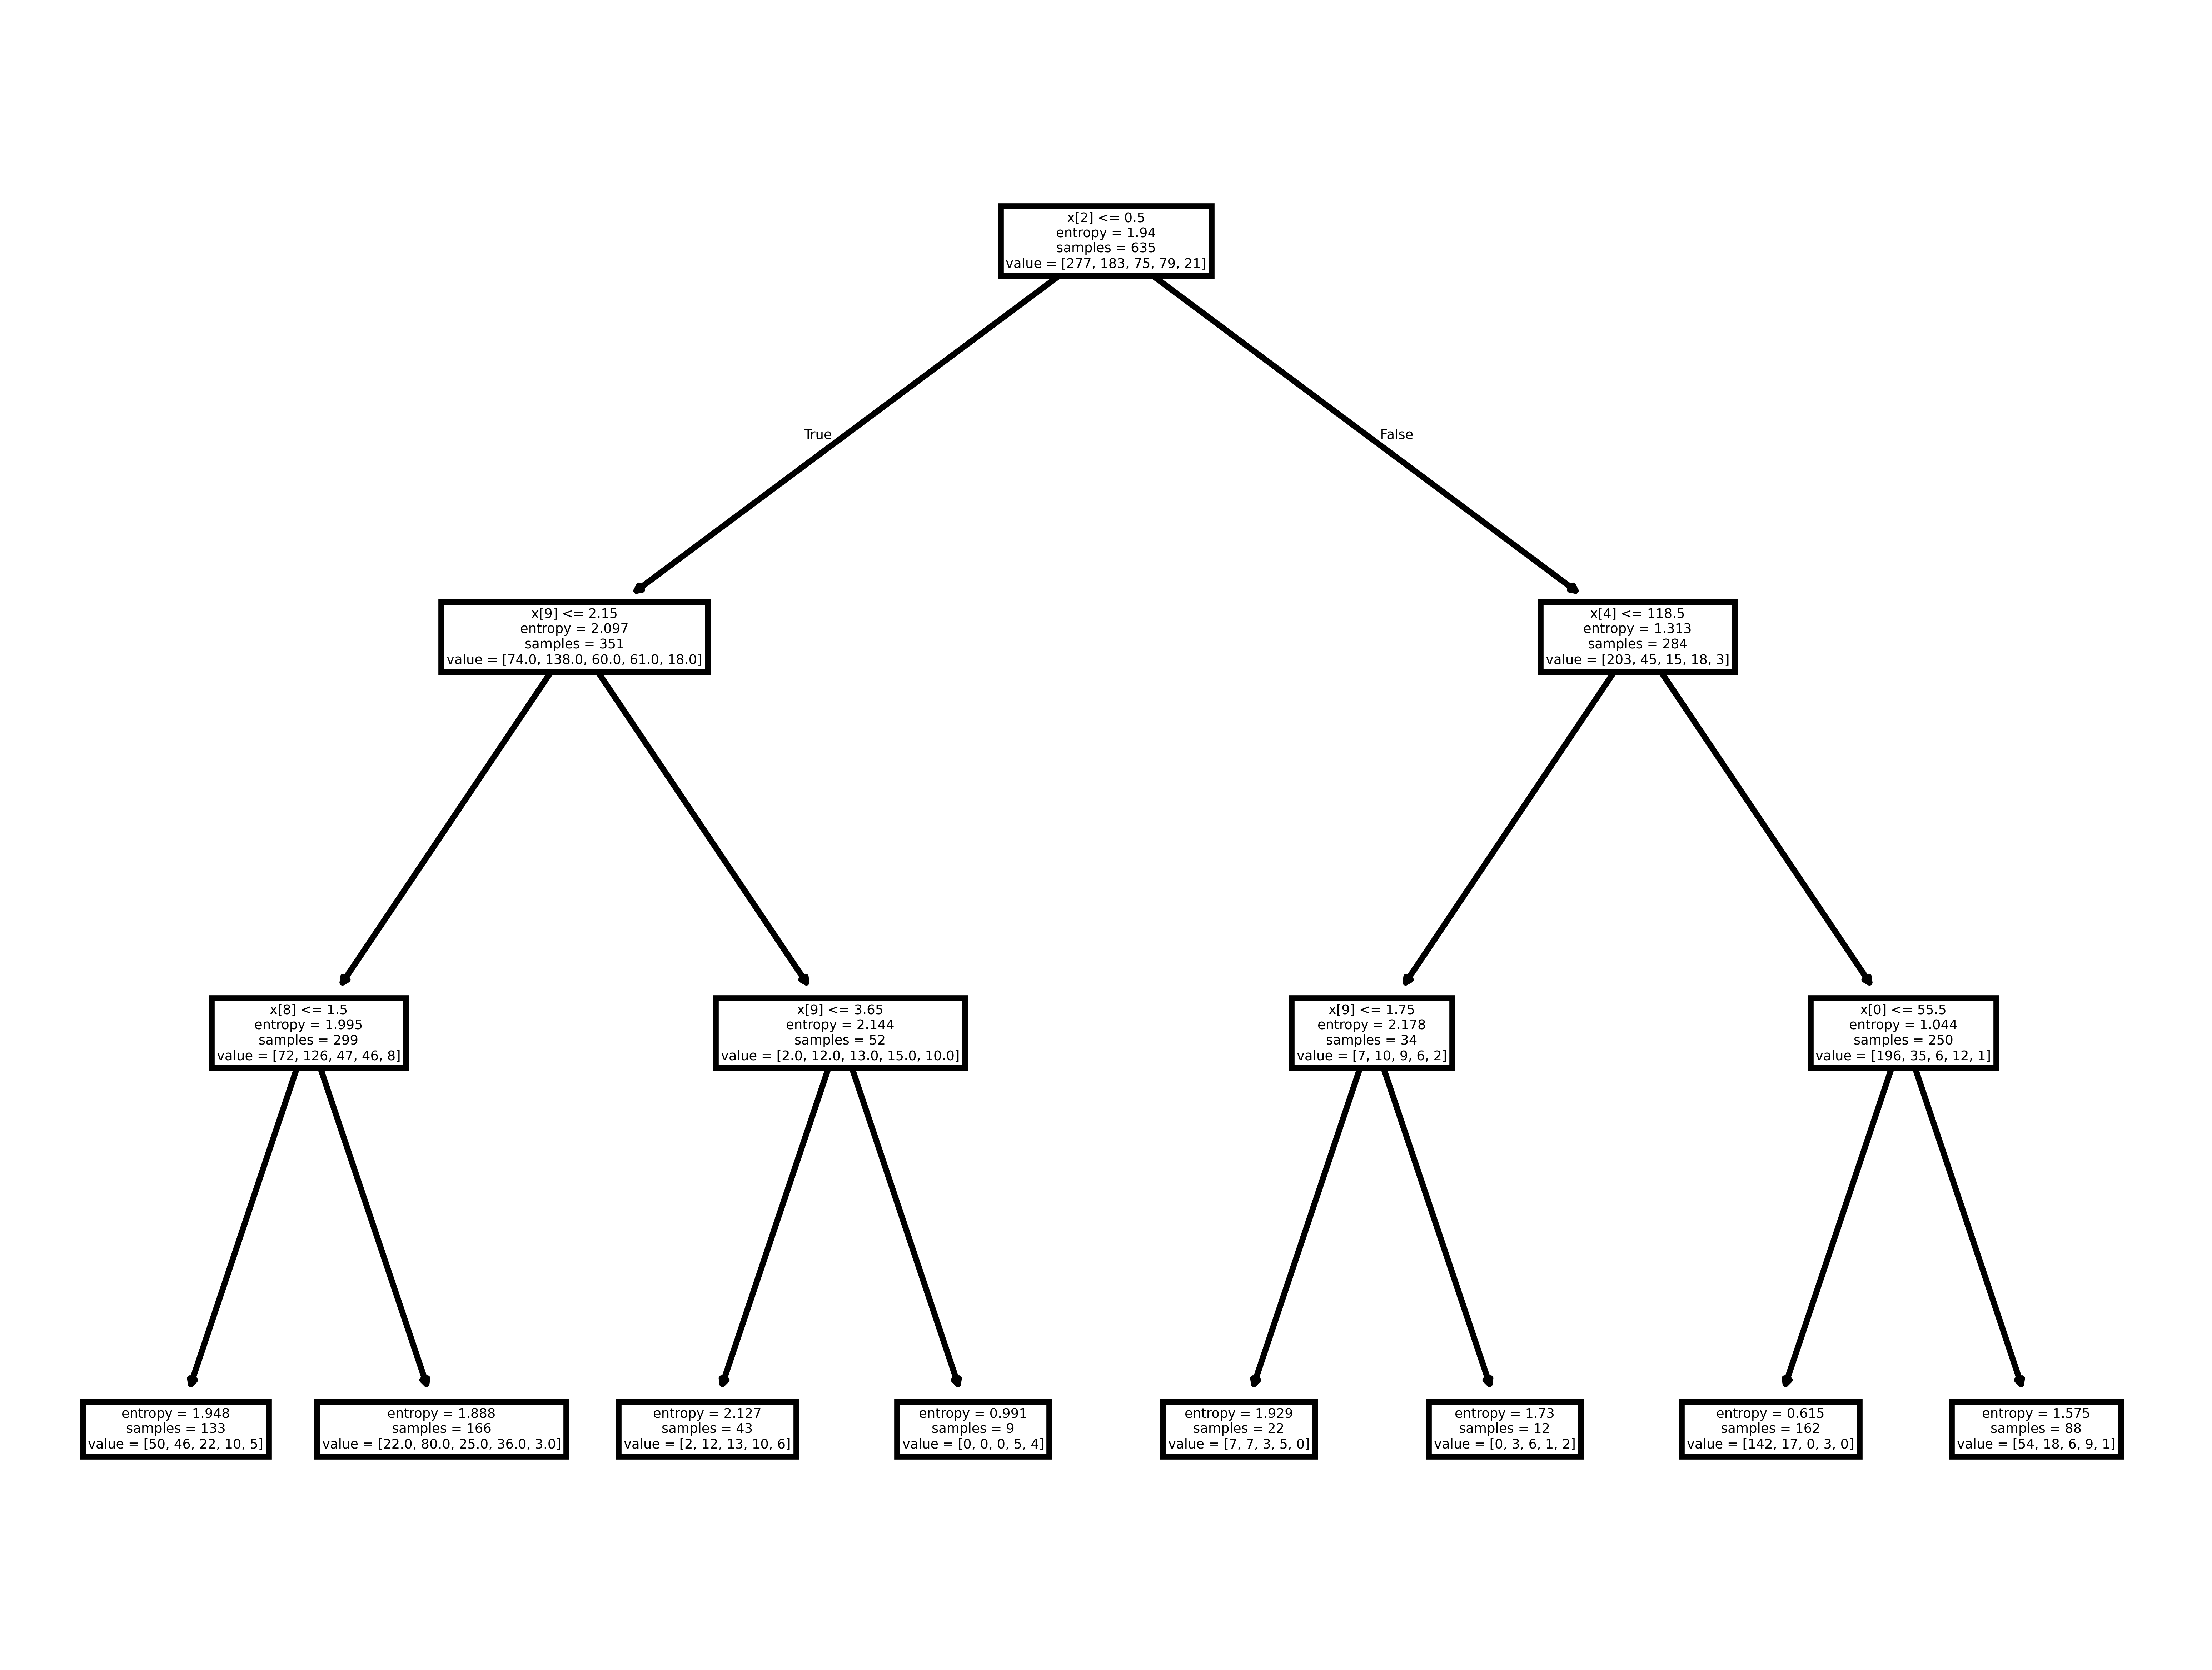

In [ ]:
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

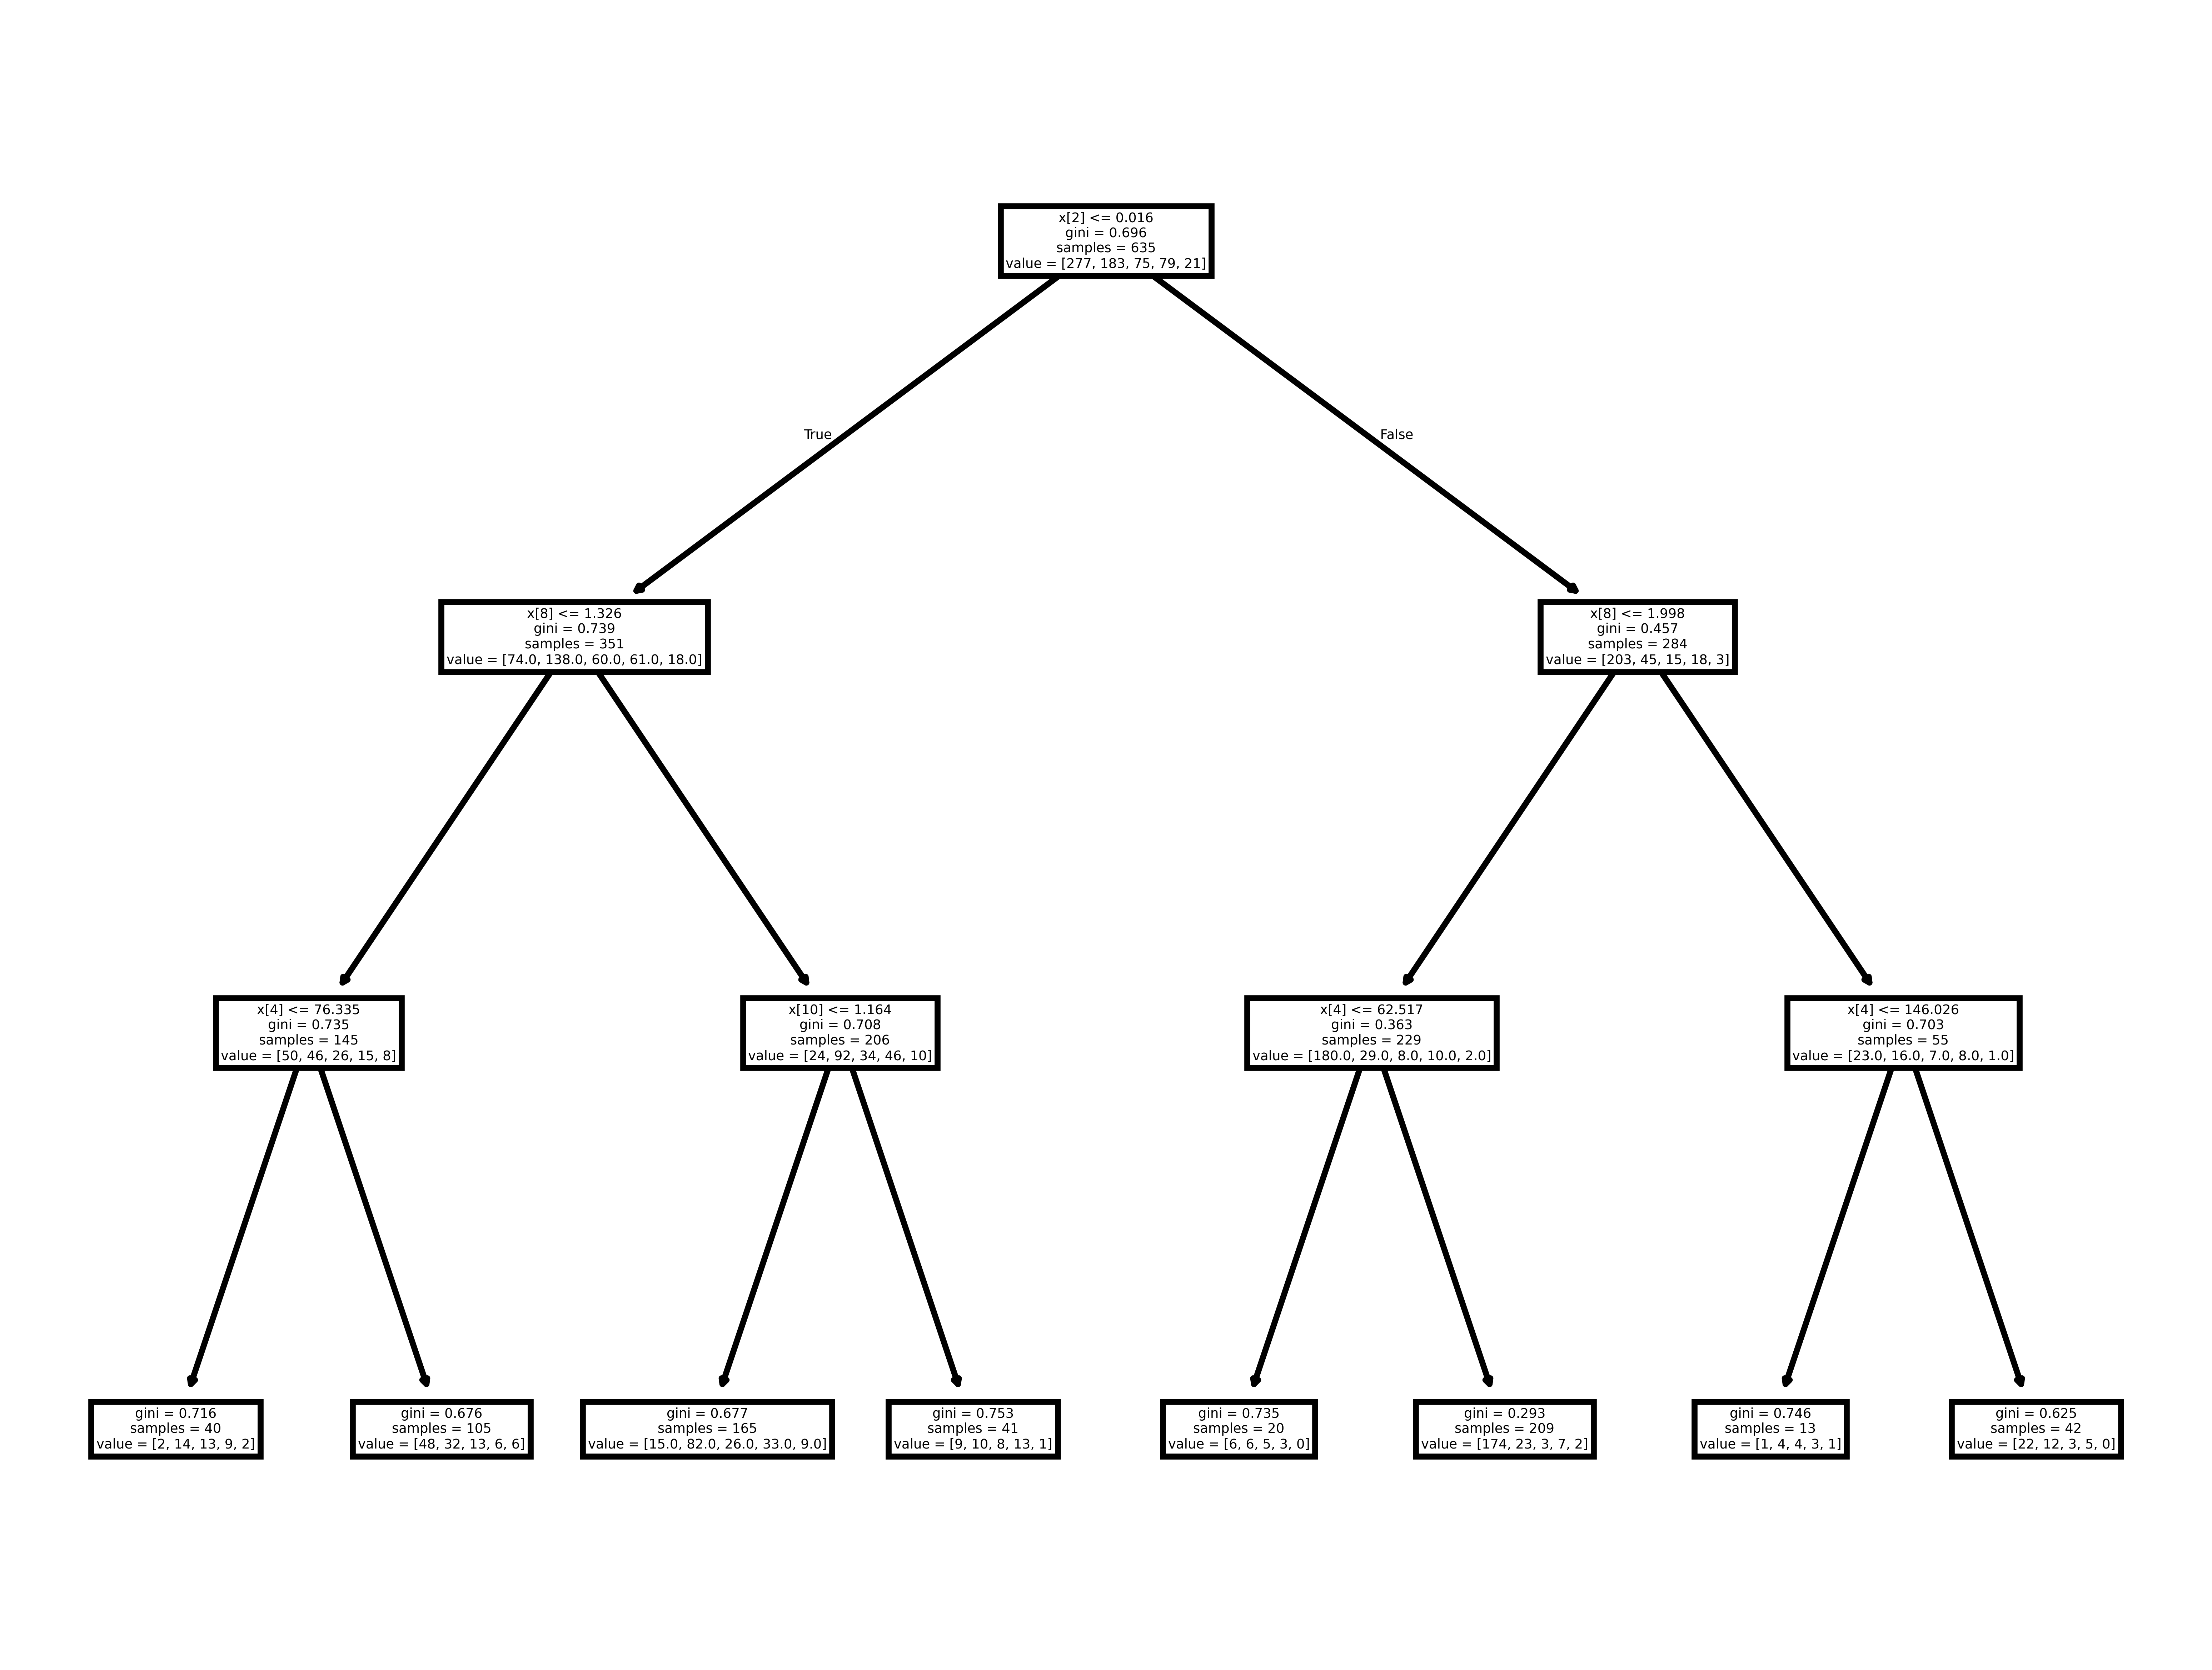

In [ ]:
plt.figure(dpi=1200)
tree.plot_tree(model2)
plt.show()

# Interview Questions:
*1. Common Decision Tree Hyperparameters:
* criterion:

Description: The function to measure the quality of a split.
Options:
For classification: gini (Gini impurity), entropy (Information gain).
For regression: mse (Mean Squared Error), mae (Mean Absolute Error).
* splitter:

Description: The strategy used to choose the split at each node.
Options: best (choose the best split), random (choose the best random split).
* max_depth:

Description: The maximum depth of the tree.
Usage: Limits the number of levels in the tree to prevent overfitting.
* min_samples_split:

Description: The minimum number of samples required to split an internal node.
Usage: Helps control the size of the tree and prevent overfitting.
* min_samples_leaf:

Description: The minimum number of samples required to be at a leaf node.
Usage: Ensures that leaf nodes have a minimum number of samples, which can help prevent overfitting.
* max_features:

Description: The number of features to consider when looking for the best split.
Options:
auto (all features),
sqrt (square root of the number of features),
log2 (logarithm base 2 of the number of features),
An integer value.
* max_leaf_nodes:

Description: The maximum number of leaf nodes in the tree.
Usage: Limits the number of leaf nodes to prevent overfitting.
* min_impurity_decrease:

Description: A node will be split if this split induces a decrease in the impurity greater than or equal to this value.
Usage: Helps control the growth of the tree.
* class_weight:

Description: Weights associated with classes in the form {class_label: weight}.
Usage: Useful for handling imbalanced datasets.


*2. Label Encoding vs. One-Hot Encoding:
* Label Encoding: Assigns each category a unique integer. Best for ordinal data with an inherent order. One-Hot Encoding: Creates binary columns for each category, suited for nominal (unordered) data.